In [1]:
%reload_ext autoreload
%autoreload 2

# Módulos propios
from utils.filefinder import getFilesFromDirectory
from imgproc.bboxes import Bbox

# Módulos externos
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from tensorflow.keras.models import load_model

In [2]:
directory = "Gotas_01/"
list_files, list_filenames = getFilesFromDirectory(directory, ".jpg")

In [24]:
loaded_model = load_model('models/dropcounter_v01_model.keras')

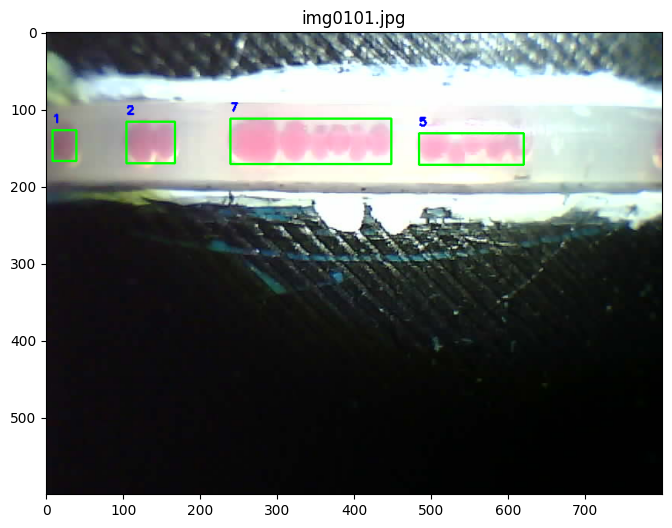

In [36]:
def getImgWithBboxesAndDrops(path_img, sdk=-1,minarea=250):

    bgr_img = cv2.imread(path_img) # Imagen BGR
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB) # Convertir a RGB
    bboxes, masks = Bbox().getBoundingBoxesForImg(bgr_img, sdk=sdk, minarea=minarea)

    rgb_img_copy = rgb_img.copy()
    preditions = []

    if len(bboxes) == 0:
        rgb_img_copy = rgb_img
    else:
        for i, pack in enumerate(zip(bboxes, masks)):
            bbox, mask = pack

            x1, y1 = bbox[0]
            x2, y2 = bbox[1]
            bbox_width = x2 - x1
            bbox_height = y2 - y1
            bbox_area = bbox_width * bbox_height
            mask_area = int(np.sum(mask) / 255)

            features = np.array([[x1/800, y1/600, x2/800, y2/600, bbox_width/800, bbox_height/600, bbox_area/(800*600), mask_area/(800*600)]])

            # Predicción
            prediction = loaded_model.predict(features, verbose=0)
            prediction = np.uint8(np.ceil(prediction[0][0]))
            preditions.append(prediction)

            cv2.rectangle(rgb_img_copy, bbox[0], bbox[1], (0, 255, 0), 2)
            cv2.putText(rgb_img_copy, str(prediction), (bbox[0][0], bbox[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    return rgb_img_copy, masks

test_img, predictions = getImgWithBboxesAndDrops(list_files[100], sdk=-1, minarea=250)

figure, ax = plt.subplots(figsize=(12, 6))
plt.imshow(test_img)
plt.title(f"{list_filenames[100]}")
plt.show()

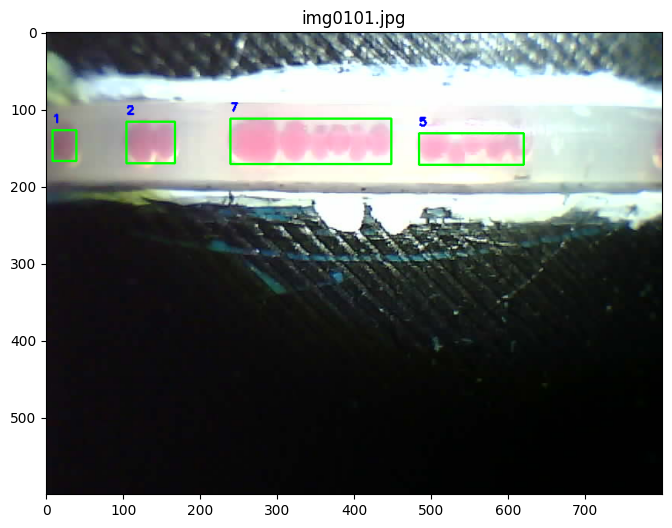

In [37]:
test_img, predictions = Bbox().getImgWithBboxesAndDrops(list_files[100], sdk=-1, minarea=250)

figure, ax = plt.subplots(figsize=(12, 6))
plt.imshow(test_img)
plt.title(f"{list_filenames[100]}")
plt.show()

In [48]:
directory = "Gotas_01/"
list_files, list_filenames = getFilesFromDirectory(directory, ".jpg")

list_img_with_bboxes_and_drops = []
for file in list_files:
    img_with_bbox_and_drops, predictions = Bbox().getImgWithBboxesAndDrops(path_img=file,sdk=-1,minarea=250)
    list_img_with_bboxes_and_drops.append(img_with_bbox_and_drops)

# Configuración del video
output_path = "videos/gotas01_bboxndrops_v02.mp4"  # Nombre del archivo de salida
fps = 5  # Cuadros por segundo (ajusta según necesites)
frame_size = (800, 600)  # Tamaño del video (ancho, alto). ¡Debe coincidir con tus imágenes!

# Inicializar VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Códec para MP4 (alternativa: 'XVID' para AVI)
video_writer = cv2.VideoWriter(output_path, fourcc, fps, frame_size)

for frame in list_img_with_bboxes_and_drops:
    # Escribir el frame en el video
    video_writer.write(frame)

# Liberar recursos
video_writer.release()

c:\Users\Lucas\miniconda3\envs\imgproc\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Lucas\miniconda3\envs\imgproc\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Lucas\miniconda3\envs\imgproc\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Lucas\miniconda3\envs\imgproc\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Lucas\miniconda3\envs\imgproc\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
